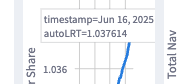

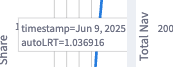

In [11]:
old_start = 1.036916
old_end = 1.037614

100 * ((old_end - old_start) / old_start) * 365 / 7

# old looks close enough

3.509996401417168

new

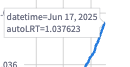

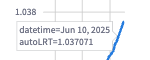

In [12]:
old_start = 1.037071
old_end = 1.037623

100 * ((old_end - old_start) / old_start) * 365 / 7

# old looks close enough

2.775398901603766

In [20]:
from mainnet_launch.data_fetching.block_timestamp import *

from mainnet_launch.data_fetching.get_state_by_block import *
from mainnet_launch.constants import *

days_without_highest_block = build_blocks_to_use(BASE_CHAIN)
days_without_highest_block[-1]

2025-05-22 16:10:59,488 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-05-22 16:10:59,489 INFO sqlalchemy.engine.Engine SELECT max(blocks.block) AS block 
FROM blocks 
WHERE blocks.chain_id = %(chain_id_1)s AND blocks.block >= %(block_1)s AND blocks.block <= %(block_2)s GROUP BY date_trunc(%(date_trunc_1)s, blocks.datetime) ORDER BY date_trunc(%(date_trunc_2)s, blocks.datetime)
2025-05-22 16:10:59,489 INFO sqlalchemy.engine.Engine [cached since 953.4s ago] {'chain_id_1': 8453, 'block_1': 21901103, 'block_2': 100000000, 'date_trunc_1': 'day', 'date_trunc_2': 'day'}
2025-05-22 16:10:59,680 INFO sqlalchemy.engine.Engine COMMIT


30541326

In [ ]:
last_second_of_each_day_since_inception = build_last_second_of_each_day_since_inception()

seconds_to_get = []

for last_second in last_second_of_each_day_since_inception:
    if last_second.date() in days_without_highest_block["timestamp"].dt.date:
        seconds_to_get.append(last_second)
seconds_to_get

[datetime.datetime(2024, 9, 15, 23, 59, 59, tzinfo=datetime.timezone.utc),
 datetime.datetime(2024, 9, 16, 23, 59, 59, tzinfo=datetime.timezone.utc),
 datetime.datetime(2024, 9, 17, 23, 59, 59, tzinfo=datetime.timezone.utc),
 datetime.datetime(2024, 9, 18, 23, 59, 59, tzinfo=datetime.timezone.utc),
 datetime.datetime(2024, 9, 19, 23, 59, 59, tzinfo=datetime.timezone.utc),
 datetime.datetime(2024, 9, 20, 23, 59, 59, tzinfo=datetime.timezone.utc),
 datetime.datetime(2024, 9, 21, 23, 59, 59, tzinfo=datetime.timezone.utc),
 datetime.datetime(2024, 9, 22, 23, 59, 59, tzinfo=datetime.timezone.utc),
 datetime.datetime(2024, 9, 23, 23, 59, 59, tzinfo=datetime.timezone.utc),
 datetime.datetime(2024, 9, 24, 23, 59, 59, tzinfo=datetime.timezone.utc),
 datetime.datetime(2024, 9, 25, 23, 59, 59, tzinfo=datetime.timezone.utc),
 datetime.datetime(2024, 9, 26, 23, 59, 59, tzinfo=datetime.timezone.utc),
 datetime.datetime(2024, 9, 27, 23, 59, 59, tzinfo=datetime.timezone.utc),
 datetime.datetime(2024, 

In [16]:
days_without_highest_block.dtypes

timestamp    datetime64[ns, UTC]
block                      int64
date                      object
dtype: object

In [ ]:
s

[]

In [11]:
days_without_highest_block["date"].values

array([datetime.date(2025, 5, 22)], dtype=object)

In [3]:
# def ensure_blocks_is_current():
#     """idempotic function """

# #     for chain in ALL_CHAINS:


# #         highest_datetime = get_highest_value_in_field_where(
# #             Blocks, Blocks.datetime, where_clause=Blocks.chain_id == chain.chain_id
# #         )

# #         if highest_datetime is None:
# #             highest_datetime = datetime.fromtimestamp(1726365887, tz=timezone.utc)  # when autoETH was deployed

# #         yesterday = datetime.now(tz=timezone.utc) - timedelta(days=1)
# #         if highest_datetime.date() < yesterday.date():
# #             highest_timestamp = int(highest_datetime.timestamp())
# #             new_timestamps = _compute_highest_timestamp_of_each_day(highest_timestamp)
# #             blocks_df = _fetch_block_df_from_subgraph(chain, new_timestamps)
# #             add_blocks_from_dataframe_to_database(blocks_df)